In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score

In [10]:
# Read in csv file
train_master = pd.read_csv('./train_master.csv').sample(10000)
pd.options.display.max_columns = None

# show columns 
print(train_master.columns)

Index(['Unnamed: 0', 'msno', 'is_churn', 'city_churn_avg',
       'registered_via_churn_avg', 'avg_payment_plan_days',
       'avg_plan_list_price', 'avg_actual_amount_paid', 'pct_is_auto_renew',
       'pct_is_cancel', 'total_transactions', 'is_cancel', 'is_auto_renew',
       'pay_method_id_churn_avg', 'Unnamed: 0.1', 'total_num_unq',
       'total_total_secs', 'daily_avg_num_25', 'daily_avg_num_50',
       'daily_avg_num_75', 'daily_avg_num_985', 'daily_avg_num_100',
       'daily_avg_num_unq', 'daily_avg_total_secs', 'tier',
       'high_cancel_high_usage'],
      dtype='object')


In [11]:
train_master.shape

(10000, 26)

In [12]:
train_master_no_nulls = train_master.dropna()

In [13]:
train_master_no_nulls.shape

(8632, 26)

In [14]:
# set up list of features
feature_cols = [
       'avg_plan_list_price', 'pct_is_auto_renew',
       'pct_is_cancel', 'high_cancel_high_usage']

In [15]:
# set up x and y variables
y = train_master_no_nulls.is_churn
X = train_master_no_nulls[feature_cols]

In [16]:
# good practice to standardize! 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [17]:
# instantiate logistic model
lr = LogisticRegression()

neglogloss = cross_val_score(lr, Xs, y, cv=10,scoring='neg_log_loss')
print (neglogloss)
print (cross_val_score(lr, Xs, y, cv=10,scoring='neg_log_loss').mean())

[-0.14089367 -0.12386238 -0.13542446 -0.13184732 -0.12942561 -0.14194131
 -0.13529196 -0.14572506 -0.13209629 -0.14263246]
-0.1359140506090466


In [18]:
accuaracy = cross_val_score(lr, Xs, y, cv=10,scoring='accuracy')
print (accuaracy)
print (cross_val_score(lr, Xs, y, cv=10,scoring='accuracy').mean())

[0.9537037  0.96064815 0.9571263  0.96292005 0.95828505 0.95480881
 0.95828505 0.95249131 0.9594438  0.95596756]
0.9573679777691945


In [35]:

# compare against baseline, if the average non-churn rate was predicted

print(1 - np.mean(y))
np.mean(y)

0.9585264133456904


0.041473586654309544

In [27]:
X['baseline'] = 0

<ipython-input-27-150fb5037265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['baseline'] = 0


In [30]:
from sklearn.metrics import log_loss

def calculate_log_loss(class_ratio,multi=10000):
    
    if sum(class_ratio)!=1.0:
        print("warning: Sum of ratios should be 1 for best results")
        class_ratio[-1]+=1-sum(class_ratio)  # add the residual to last class's ratio
    
    actuals=[]
    for i,val in enumerate(class_ratio):
        actuals=actuals+[i for x in range(int(val*multi))]
        

    preds=[]
    for i in range(multi):
        preds+=[class_ratio]

    return (log_loss(actuals, preds))

In [39]:
logloss=calculate_log_loss([0.04,0.96],multi=100)
-logloss

-0.167944147734173

Feature: 0, Score: 0.03641
Feature: 1, Score: -0.86161
Feature: 2, Score: 0.40111
Feature: 3, Score: -0.82437


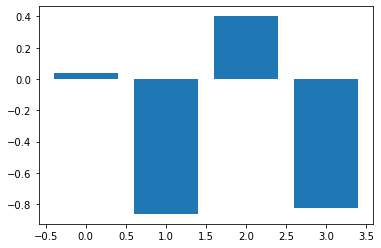

In [40]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(Xs, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# set up list of features
feature_cols = [
       'avg_plan_list_price', 'pct_is_auto_renew',
       'pct_is_cancel', 'high_cancel_high_usage']